In [1]:
import pandas as pd

In [2]:
mp = pd.read_csv('trainRF.csv')

In [3]:
mp.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
mp.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [5]:
mp.select_dtypes(include='object').columns

Index([], dtype='object')

### Sampling

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
mp_train, mp_test = train_test_split(mp,test_size=0.2)

In [8]:
mp_train_x = mp_train.iloc[ : , :-1]
mp_train_y = mp_train.iloc[ : , -1]

In [9]:
mp_test_x = mp_test.iloc[ : , :-1]
mp_test_y = mp_test.iloc[ : , -1]

### Model building

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
dt = DecisionTreeClassifier()

In [15]:
from sklearn.model_selection import GridSearchCV

In [23]:
search_dict = {'criterion':['gini','entropy'],  # hyperparameter Tuning
               'max_depth': range(3,10),
               'min_samples_split':range(5,30)}

In [24]:
grid = GridSearchCV(dt,param_grid= search_dict)

In [25]:
grid.fit(mp_train_x,mp_train_y)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 10),
                         'min_samples_split': range(5, 30)})

In [26]:
grid.best_params_  # best parameter 

{'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 13}

In [29]:
pred_grid = grid.predict(mp_test_x)

In [33]:
from sklearn.metrics import confusion_matrix

In [37]:
tab = confusion_matrix(mp_test_y,pred_grid)
tab

array([[87, 10,  0,  0],
       [ 8, 83,  9,  0],
       [ 0,  7, 79, 15],
       [ 0,  0, 10, 92]], dtype=int64)

### Accuracy

In [38]:
Accuracy = tab.diagonal().sum()*100/tab.sum()
Accuracy 

85.25

### Feature Importance

In [45]:
dt = DecisionTreeClassifier(criterion= 'gini', max_depth= 9, min_samples_split = 13)

In [46]:
dt.fit(mp_train_x,mp_train_y)

DecisionTreeClassifier(max_depth=9, min_samples_split=13)

In [47]:
dt.feature_importances_

array([1.54633347e-01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       3.43977311e-03, 0.00000000e+00, 3.99298356e-03, 6.91549349e-03,
       3.88954818e-03, 0.00000000e+00, 5.42754317e-03, 7.46743711e-02,
       8.53394127e-02, 6.52353961e-01, 0.00000000e+00, 1.69610724e-03,
       7.42870834e-03, 2.08751661e-04, 0.00000000e+00, 0.00000000e+00])

In [48]:
mp_train_x.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

In [49]:
feat_imp_df = pd.DataFrame()
feat_imp_df['Features'] = mp_train_x.columns
feat_imp_df['Imp'] = dt.feature_importances_

In [50]:
feat_imp_df.sort_values('Imp',ascending=False)

,Features,Imp
13,ram,0.652354
0,battery_power,0.154633
12,px_width,0.085339
11,px_height,0.074674
16,talk_time,0.007429
7,m_dep,0.006915
10,pc,0.005428
6,int_memory,0.003993
8,mobile_wt,0.003890
4,fc,0.003440


### Tree

In [39]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.


In [23]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [52]:
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
import pydot
from IPython.display import Image 
from six import StringIO


In [26]:
conda install graphviz

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\MR.GODHADE\anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.16.0               |       he04af86_2         1.5 MB
    expat-2.4.9                |       h6c2663c_0         207 KB
    fribidi-1.0.10             |       h62dcd97_0          63 KB
    getopt-win32-0.1           |       h2bbff1b_0          19 KB
    glib-2.69.1                |       h5dc1a3c_1         1.6 MB
    graphite2-1.3.14           |       hd77b12b_1          91 KB
    graphviz-2.50.0            |       hdb8b0d4_0         903 KB
    gts-0.7.6                  |       h63ab5a1_3         181 KB
    harfbuzz-4.3.0             |       hb646838_1         855 KB
    libffi-3.4.4               |       hd77b12b_0         113 KB
    libgd-2.3.3                |       ha43c60c_



==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda




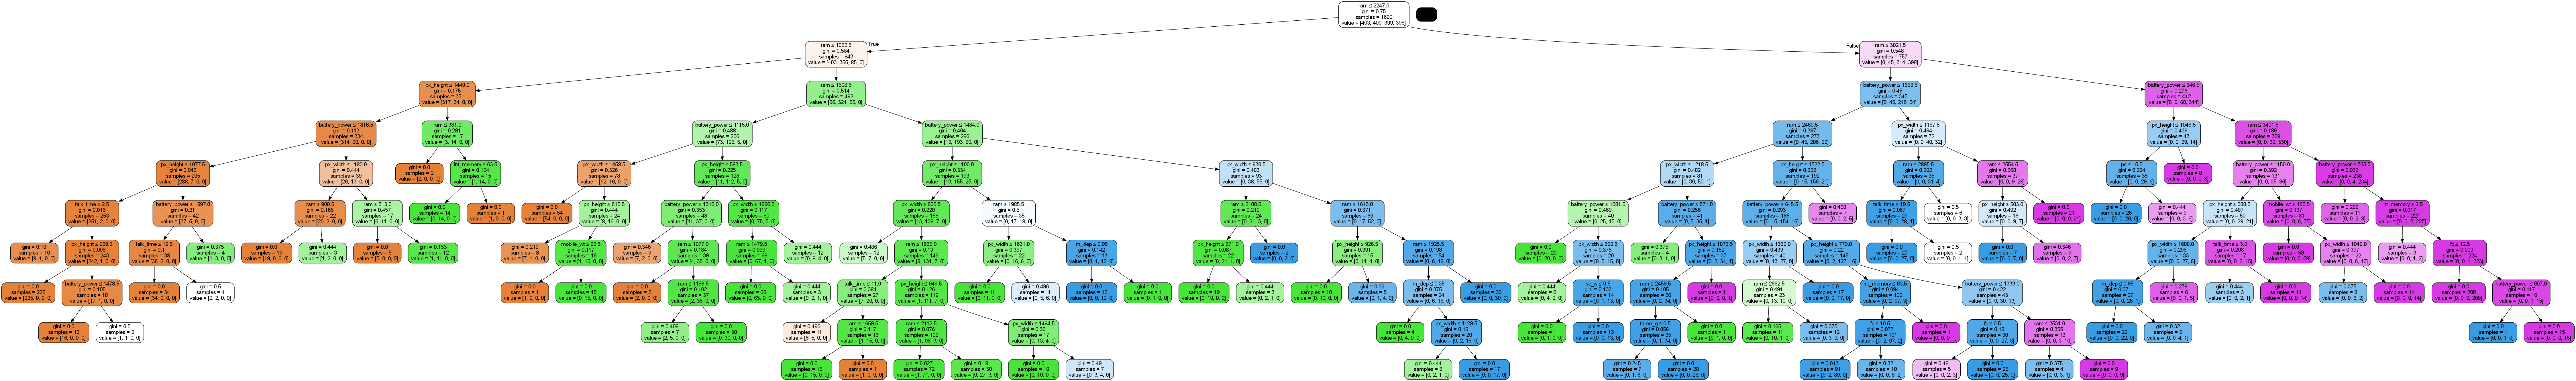

<Figure size 1200x1200 with 0 Axes>

In [53]:
dot_data = StringIO()  ## creating a empty  file 
import matplotlib.pyplot as plt
fig= plt.figure(figsize=(12,12))

export_graphviz(dt, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True , feature_names=mp_train_x.columns  )
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  

(graph,) = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())